In [ ]:
!pip install uv
!pip install -r requirements.txt

**1. Import Necessary Libraries**

Run this cell first to import all required libraries.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot, autocorrelation_plot

Matplotlib is building the font cache; this may take a moment.


**2. Generate Synthetic Time Series Data**

This creates a time series dataset with trend, seasonality, and noise.

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

# Create a date range for two years
dates = pd.date_range(start='2020-01-01', periods=730, freq='D')

# Generate components of the time series
trend = np.linspace(10, 20, 730) + np.cumsum(np.random.normal(0, 0.05, 730))  # Linear trend + small random walk
seasonality = 5 * np.sin(2 * np.pi * np.arange(730) / 365)  # Yearly seasonality
noise = np.random.normal(0, 0.5, 730)  # Reduce noise amplitude

# Combine components
data_values = trend + seasonality + noise

# Create Pandas DataFrame
df = pd.DataFrame({'date': dates, 'sales': data_values})
df.set_index('date', inplace=True)

# Display first few rows
df.head()

,sales
date,
2020-01-01,10.122758
2020-01-02,9.628520
2020-01-03,10.453976
2020-01-04,9.574417
2020-01-05,11.028210


**3. Plot Time Series Data**

This plots the generated synthetic sales data.

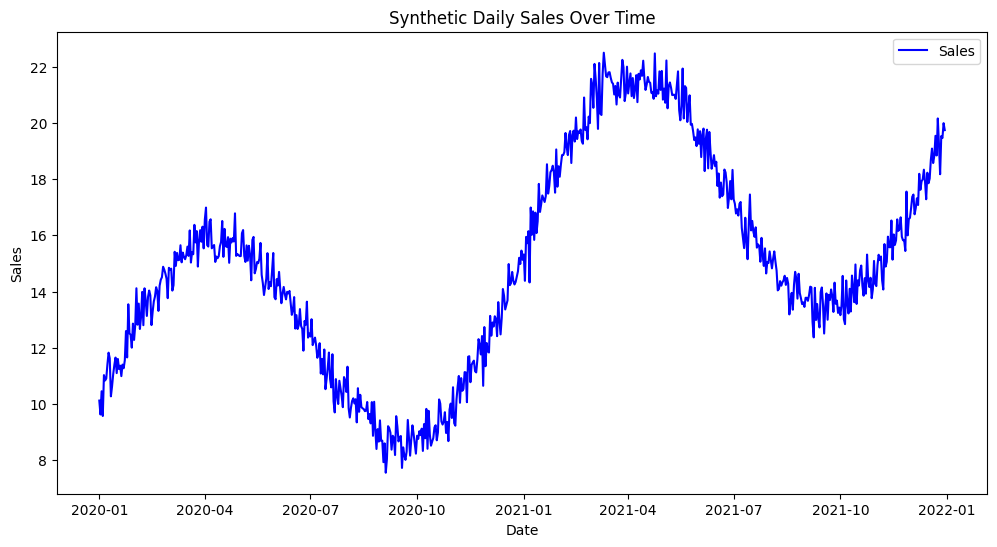

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['sales'], label="Sales", color='b')
plt.title("Synthetic Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

**4. Decomposing the Time Series**

Break down the series into trend, seasonality, and residuals.

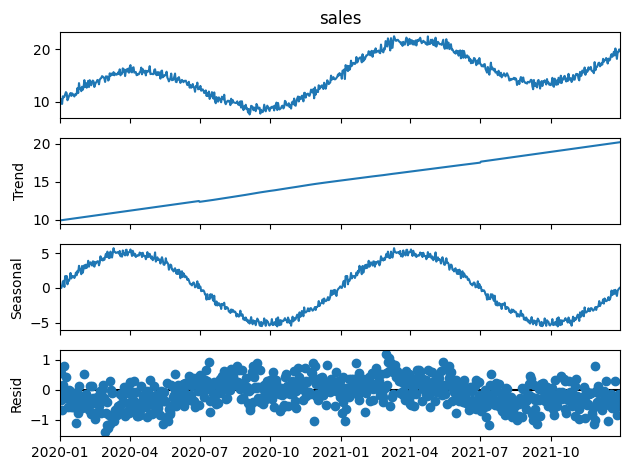

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition with improved settings
decomposition = seasonal_decompose(df['sales'], model='additive', period=365, extrapolate_trend='freq')

# Plot decomposition results
decomposition.plot()
plt.tight_layout()
plt.show()

**5. Create Monthly Box Plots**

This visualizes how sales data is distributed over different months.

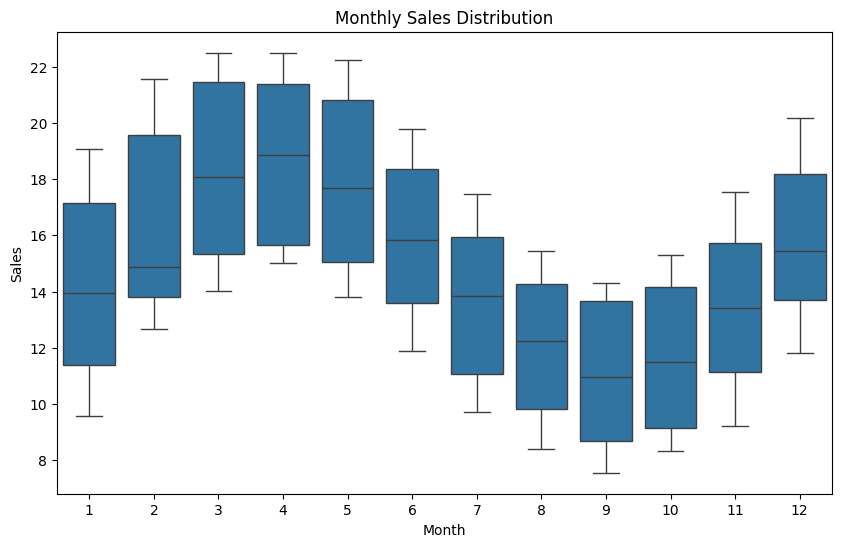

In [18]:
df['month'] = df.index.month  # Extract month from date

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='sales', data=df)
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

**6. Generate and Plot a Heatmap**

This visualizes average sales by month and year

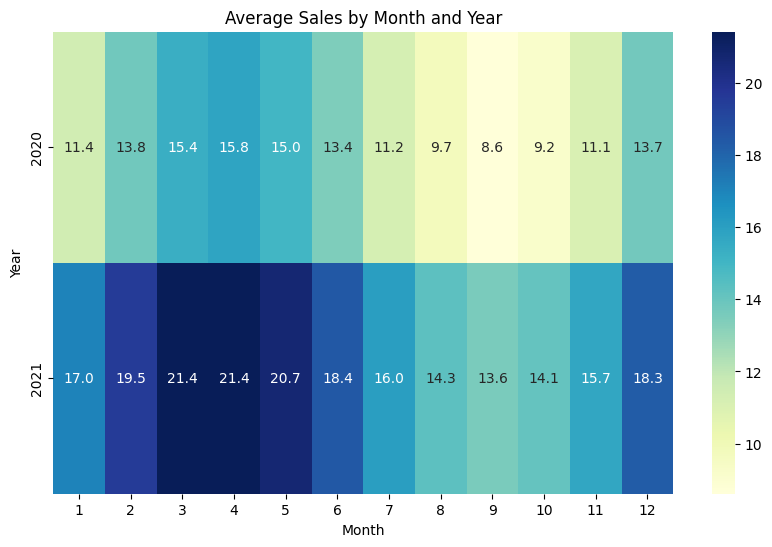

In [19]:
df['year'] = df.index.year  # Extract year

# Create a pivot table: average sales by month per year
pivot = df.pivot_table(values='sales', index='year', columns='month', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Average Sales by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

**7. Lag and Autocorrelation Plots**

These plots help understand how past values influence future values.

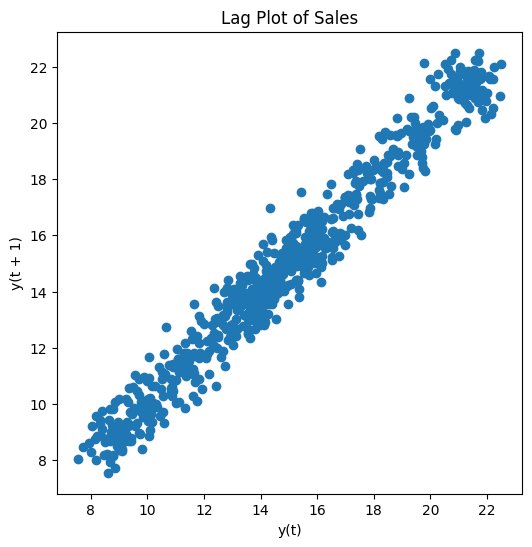

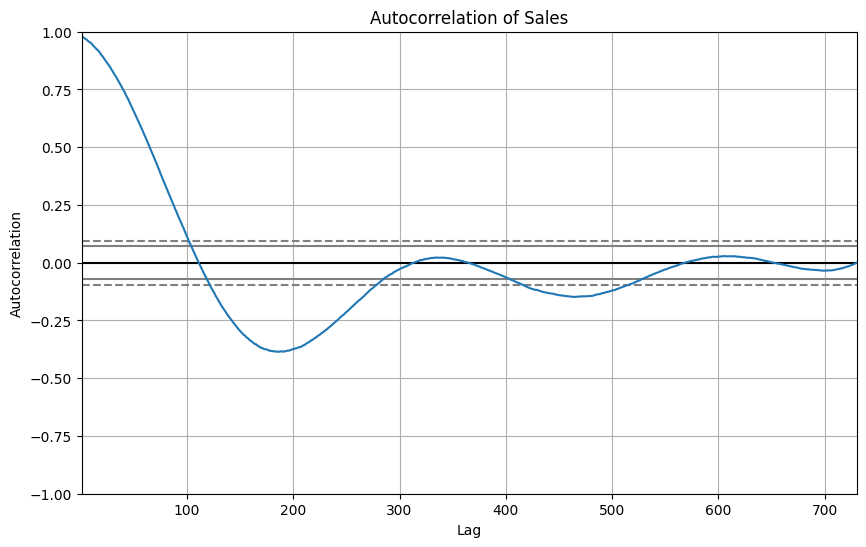

In [20]:
# Lag Plot
plt.figure(figsize=(6, 6))
lag_plot(df['sales'])
plt.title("Lag Plot of Sales")
plt.show()

# Autocorrelation Plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['sales'])
plt.title("Autocorrelation of Sales")
plt.show()

**8. Save the Data for Future Use**

This saves the generated dataset to a CSV file.

In [13]:
df.to_csv("synthetic_sales_data.csv")
print("Dataset saved as 'synthetic_sales_data.csv'")

Dataset saved as 'synthetic_sales_data.csv'


## **How to Use This Notebook**

1.	Copy each section into separate cells in an IPython notebook.
2.	Run them sequentially to generate and explore time series data.
3.	Modify the dataset generation (e.g., change period=365 in decomposition for different frequencies).
4.	Save the data for later forecasting model training.

This setup provides a hands-on approach to understanding time series forecasting while using LLMs to generate relevant Python code. 🚀